# Линейные модели

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import datasets

# Boston dataset (регрессия)

In [2]:
boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
print(boston.DESCR[100:1300])

tics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 

In [4]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


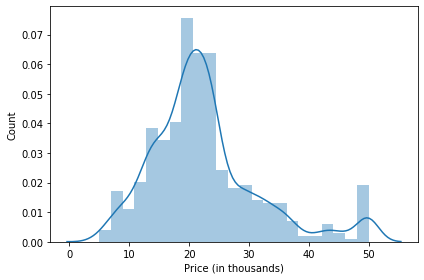

In [6]:
plt.figure(figsize=(6, 4))
sns.distplot(boston.target)

plt.xlabel('Price (in thousands)')
plt.ylabel('Count')
plt.tight_layout()

In [7]:
from sklearn.linear_model import LinearRegression


linear_regression = LinearRegression()
model = linear_regression.fit(boston.data, boston.target)
#boston.target -целевая переменная

In [8]:
feature_weight_df = pd.DataFrame(list(zip(boston.feature_names, model.coef_)))
feature_weight_df.columns = ['Feature', 'Weight']
print(feature_weight_df)

    Feature     Weight
0      CRIM  -0.108011
1        ZN   0.046420
2     INDUS   0.020559
3      CHAS   2.686734
4       NOX -17.766611
5        RM   3.809865
6       AGE   0.000692
7       DIS  -1.475567
8       RAD   0.306049
9       TAX  -0.012335
10  PTRATIO  -0.952747
11        B   0.009312
12    LSTAT  -0.524758


In [9]:
import operator

first_predicted = sum(map(
    lambda pair: operator.mul(*pair),
    zip(model.coef_, boston.data[0])
))

print(first_predicted)

-6.455645008073041


In [10]:
print(model.intercept_)

36.459488385089855


In [11]:
first_predicted += model.intercept_
print(first_predicted)

30.003843377016814


In [12]:
predicted = model.predict(boston.data)

print(predicted[:10])

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423 25.25628446
 23.00180827 19.53598843 11.52363685 18.92026211]


In [13]:
predictions_ground_truth_df = pd.DataFrame(list(zip(predicted, boston.target)))
predictions_ground_truth_df.columns = ['Prediction', 'Ground truth']
predictions_ground_truth_df.head()

,Prediction,Ground truth
0,30.003843,24.0
1,25.025562,21.6
2,30.567597,34.7
3,28.607036,33.4
4,27.943524,36.2


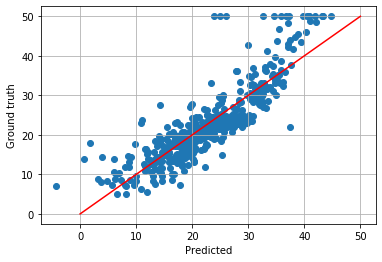

In [31]:
plt.figure(figsize=(6, 4))
plt.scatter(predicted, boston.target)
plt.xlabel('Predicted')
plt.ylabel('Ground truth')

plt.plot([0, 50], [0, 50], color="red")
plt.grid()

# Breast Cancer dataset (классификация)

In [14]:
cancer = datasets.load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [15]:
print(cancer.DESCR[:760])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline app


In [16]:
cancer_df = pd.DataFrame(cancer.data)
cancer_df.columns = cancer.feature_names
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Text(0, 0.5, 'Count')

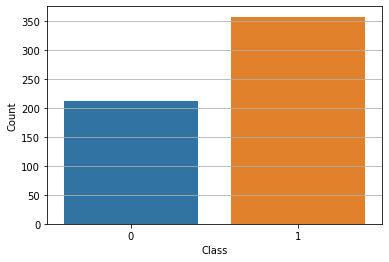

In [17]:
plt.figure(figsize=(6, 4))
plt.grid()
sns.countplot(cancer.target)

plt.xlabel('Class')
plt.ylabel('Count')


In [18]:
from sklearn.linear_model import LogisticRegression


logistic_regression = LogisticRegression()
model = logistic_regression.fit(cancer.data, cancer.target)

print(model.coef_)

[[ 0.78633608  0.35682106  0.32840809 -0.01027991 -0.0281833  -0.13460908
  -0.18871165 -0.07933034 -0.03910018 -0.0077253   0.03331418  0.30050892
   0.10117744 -0.11198053 -0.00257319 -0.02912277 -0.04048654 -0.01036201
  -0.00947174 -0.0026883   0.83420315 -0.44538697 -0.23587115 -0.01885825
  -0.05138827 -0.42129357 -0.52438625 -0.15296657 -0.12479857 -0.04022242]]


C:\Users\Rafael\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [19]:
prediction = model.predict(cancer.data)
print(prediction[10:20])

[0 0 0 1 1 0 0 0 0 1]


In [20]:
prediction = model.predict_proba(cancer.data)
print(prediction[10:20])

[[9.99477492e-01 5.22507518e-04]
 [9.99997384e-01 2.61615684e-06]
 [9.99994244e-01 5.75576162e-06]
 [1.02679168e-01 8.97320832e-01]
 [3.09087353e-01 6.90912647e-01]
 [9.98460005e-01 1.53999474e-03]
 [9.99962077e-01 3.79228560e-05]
 [9.99994118e-01 5.88242213e-06]
 [1.00000000e+00 1.04617871e-17]
 [3.15290860e-02 9.68470914e-01]]


In [21]:
print('Accuracy: {}'.format(model.score(cancer.data, cancer.target)))

Accuracy: 0.9472759226713533


In [22]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}